In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

# Importing the dataset by giving the path and displaying first 10 values
train = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\datasets ds\data sets\linear regression\train-data.csv")
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
test=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\datasets ds\data sets\linear regression\test-data.csv")
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [11]:
#merging the dataframes randomizing the rows
# Randomly select rows from the first data frame and the second dataframe
sample1 = train.sample(frac=1)
sample2 = test.sample(frac=1)
#append the randomly selected rows
merged_df = pd.concat([sample1, sample2], ignore_index=True)
# Optionally, shuffle the rows of the merged data frame
merged_df = merged_df.sample(frac=1)
merged_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3406,2774,Volkswagen Polo GT TSI,Mumbai,2017,27853,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,11.26 Lakh,8.25
613,556,Toyota Etios Liva GD,Chennai,2013,179000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.04 bhp,5.0,NaN,3.80
5128,2006,Ford Ikon 1.4 TDCi DuraTorq,Bangalore,2009,75000,Diesel,Manual,First,13.8 kmpl,1399 CC,68 bhp,5.0,NaN,1.99
1351,1943,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Mumbai,2013,45200,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,23.00
1830,4190,Volkswagen Vento 1.2 TSI Highline AT,Pune,2016,55001,Petrol,Automatic,Second,16.93 kmpl,1197 CC,103.2 bhp,5.0,NaN,8.50


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 3406 to 6310
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


In [13]:
#dropping rows with missing "New_Price"
merged_df.isnull().any()

Unnamed: 0           False
Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                 True
dtype: bool

In [14]:
merged_df = merged_df.dropna(subset=['New_Price'])

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 3406 to 6310
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1006 non-null   int64  
 1   Name               1006 non-null   object 
 2   Location           1006 non-null   object 
 3   Year               1006 non-null   int64  
 4   Kilometers_Driven  1006 non-null   int64  
 5   Fuel_Type          1006 non-null   object 
 6   Transmission       1006 non-null   object 
 7   Owner_Type         1006 non-null   object 
 8   Mileage            1005 non-null   object 
 9   Engine             1006 non-null   object 
 10  Power              1006 non-null   object 
 11  Seats              1006 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              824 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 117.9+ KB


In [16]:
column_to_drop = ['Unnamed: 0']

# Check if the column exists before trying to drop it
if 'Unnamed: 0' in merged_df.columns:
    merged_df = merged_df.drop(column_to_drop, axis=1)
else:
    print("Column 'Unnamed: 0' not found in the DataFrame.")

merged_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3406,Volkswagen Polo GT TSI,Mumbai,2017,27853,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,11.26 Lakh,8.25
4021,Ford EcoSport 1.5 Diesel Titanium,Mumbai,2017,26000,Diesel,Manual,First,23.0 kmpl,1498 CC,98.96 bhp,5.0,11.89 Lakh,8.99
359,Toyota Etios Cross 1.4L VD,Jaipur,2014,62322,Diesel,Manual,First,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.55 Lakh,4.90
3036,Maruti Alto K10 VXI,Pune,2014,17000,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,4.48 Lakh,2.10
6248,Mercedes-Benz SLC 43 AMG,Coimbatore,2018,18338,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,1.06 Cr,NaN


In [17]:
merged_df['Location'].unique()

array(['Mumbai', 'Jaipur', 'Pune', 'Coimbatore', 'Kochi', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Delhi'],
      dtype=object)

In [18]:
merged_df['New_Price'].unique()

array(['11.26 Lakh', '11.89 Lakh', '9.55 Lakh', '4.48 Lakh', '1.06 Cr',
       '12.68 Lakh', '5.87 Lakh', '36.45 Lakh', '63.71 Lakh',
       '56.98 Lakh', '8.68 Lakh', '7.7 Lakh', '6.67 Lakh', '28.05 Lakh',
       '22.74 Lakh', '44.28 Lakh', '16.04 Lakh', '20.74 Lakh',
       '11.33 Lakh', '5.77 Lakh', '24.02 Lakh', '44.8 Lakh', '20.87 Lakh',
       '18.45 Lakh', '13.4 Lakh', '70.43 Lakh', '48.18 Lakh', '6.68 Lakh',
       '1.6 Cr', '20.48 Lakh', '26.95 Lakh', '4.71 Lakh', '5.29 Lakh',
       '12.44 Lakh', '10.57 Lakh', '10.32 Lakh', '15.06 Lakh',
       '12.53 Lakh', '5.3 Lakh', '62.07 Lakh', '4.87 Lakh', '6.59 Lakh',
       '78.76 Lakh', '1.02 Cr', '7.12 Lakh', '23.64 Lakh', '9.74 Lakh',
       '6.32 Lakh', '7.96 Lakh', '34.63 Lakh', '32.41 Lakh', '9.58 Lakh',
       '10.04 Lakh', '3.91 Lakh', '35 Lakh', '15.05 Lakh', '43.31 Lakh',
       '11.67 Lakh', '6.41 Lakh', '7.87 Lakh', '26.55 Lakh', '10.15 Lakh',
       '6.55 Lakh', '18.16 Lakh', '11.47 Lakh', '54.43 Lakh',
       '59.38 Lak

In [19]:
def fill_missing_values(merged_df):
    # Fill missing categorical data with mode
    if 'Mileage' in merged_df.columns:
        merged_df['Mileage'].fillna(merged_df['Mileage'].mode()[0], inplace=True)

    # Fill missing numeric data with mean
    if 'Price' in merged_df.columns:
        merged_df['Price'].fillna(merged_df['Price'].mean(), inplace=True)

# Call the function to fill missing values
fill_missing_values(merged_df)

# Display the updated DataFrame
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 3406 to 6310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1006 non-null   object 
 1   Location           1006 non-null   object 
 2   Year               1006 non-null   int64  
 3   Kilometers_Driven  1006 non-null   int64  
 4   Fuel_Type          1006 non-null   object 
 5   Transmission       1006 non-null   object 
 6   Owner_Type         1006 non-null   object 
 7   Mileage            1006 non-null   object 
 8   Engine             1006 non-null   object 
 9   Power              1006 non-null   object 
 10  Seats              1006 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              1006 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 110.0+ KB


In [129]:
#extracting the numerical valeues and converting it to a float of the new price column
merged_df['New_Price'] = merged_df['New_Price'].replace('[^\d.]', '', regex=True).astype(float)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2995 to 6359
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1006 non-null   object 
 1   Location           1006 non-null   object 
 2   Year               1006 non-null   int64  
 3   Kilometers_Driven  1006 non-null   int64  
 4   Fuel_Type          1006 non-null   object 
 5   Transmission       1006 non-null   object 
 6   Owner_Type         1006 non-null   object 
 7   Mileage            1006 non-null   object 
 8   Engine             1006 non-null   object 
 9   Power              1006 non-null   object 
 10  Seats              1006 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              1006 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 110.0+ KB


In [130]:
#extracting the numerical valeues and converting it to a float of the new price column
merged_df['Mileage'] = merged_df['Mileage'].replace('[^\d.]', '', regex=True).astype(float)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2995 to 6359
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1006 non-null   object 
 1   Location           1006 non-null   object 
 2   Year               1006 non-null   int64  
 3   Kilometers_Driven  1006 non-null   int64  
 4   Fuel_Type          1006 non-null   object 
 5   Transmission       1006 non-null   object 
 6   Owner_Type         1006 non-null   object 
 7   Mileage            1006 non-null   float64
 8   Engine             1006 non-null   object 
 9   Power              1006 non-null   object 
 10  Seats              1006 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              1006 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 110.0+ KB


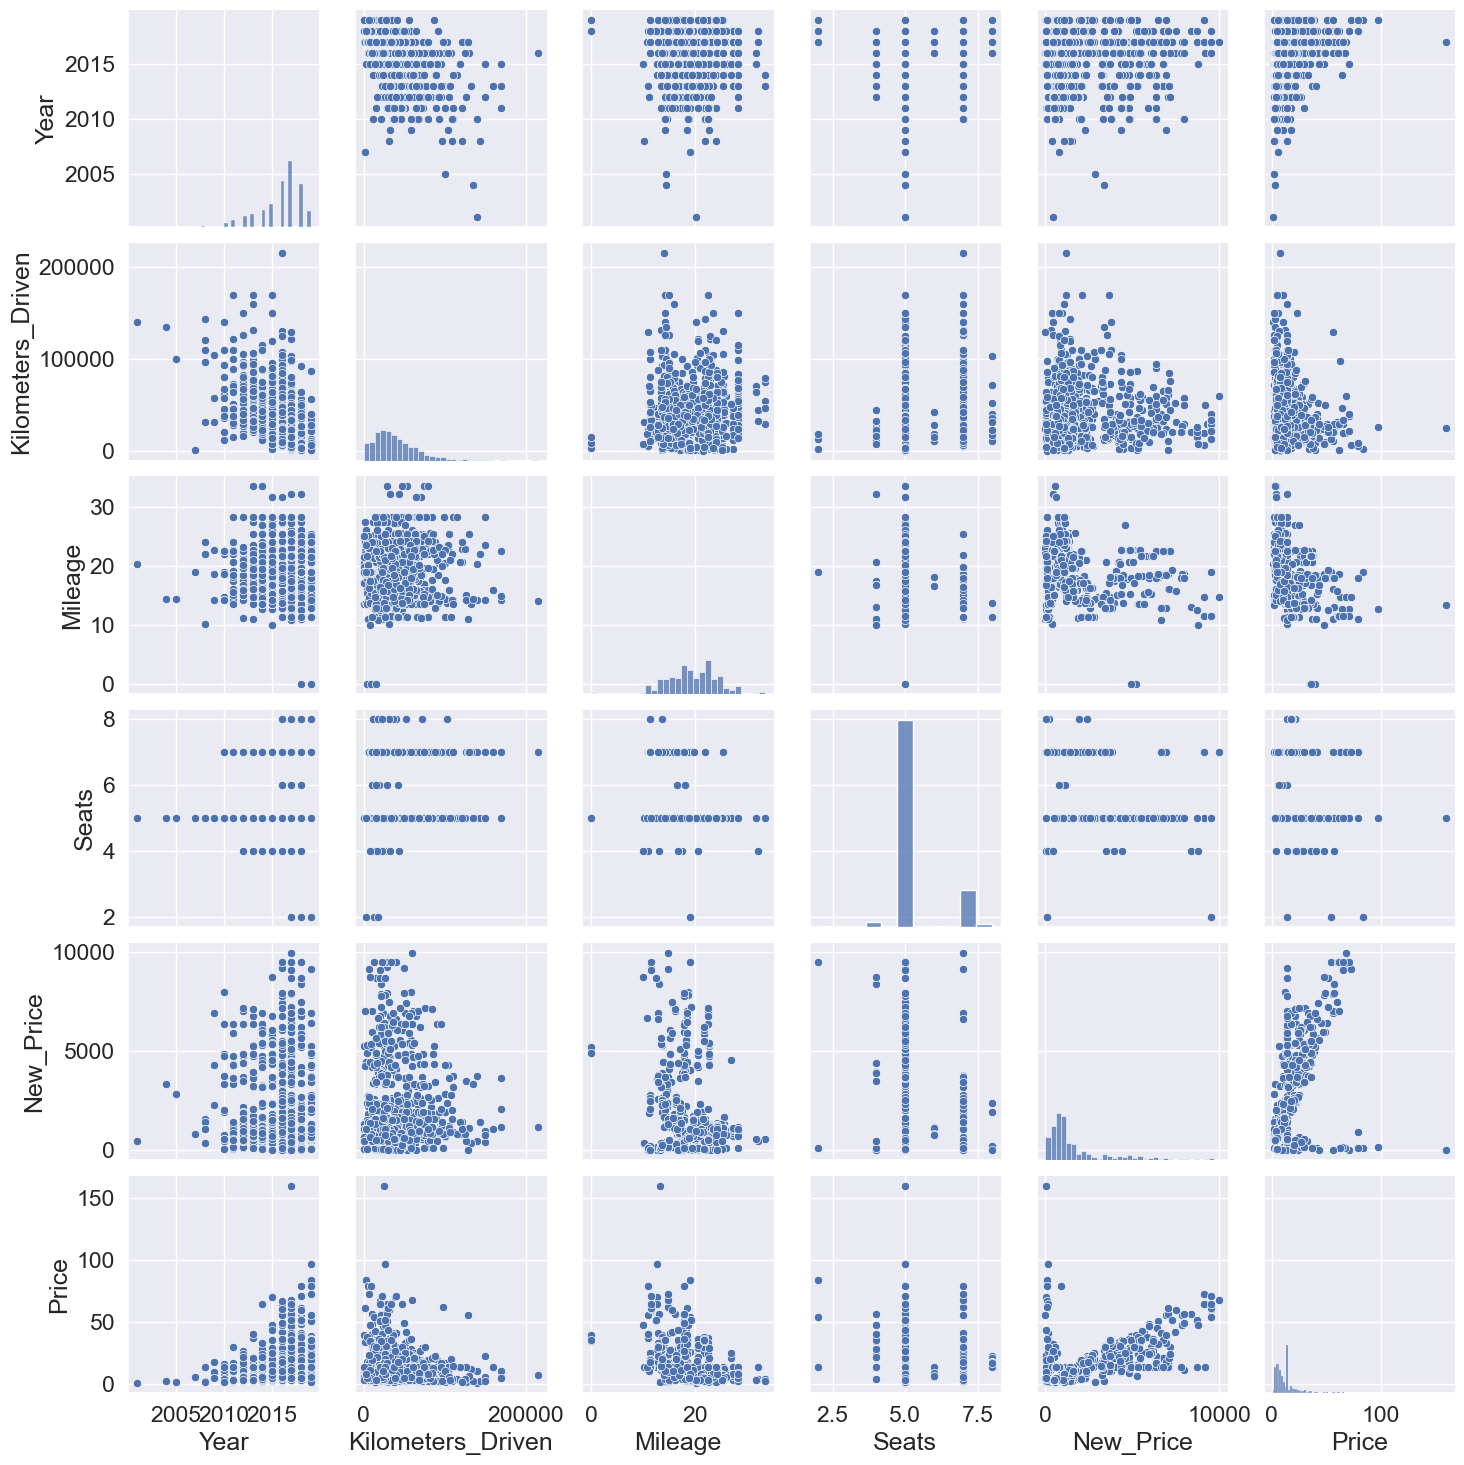

In [91]:
sns.pairplot(merged_df)
plt.show()

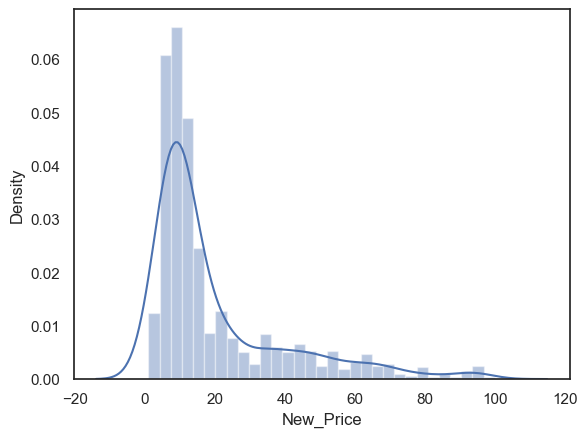

In [23]:
sns.distplot(merged_df['New_Price'])
plt.show()

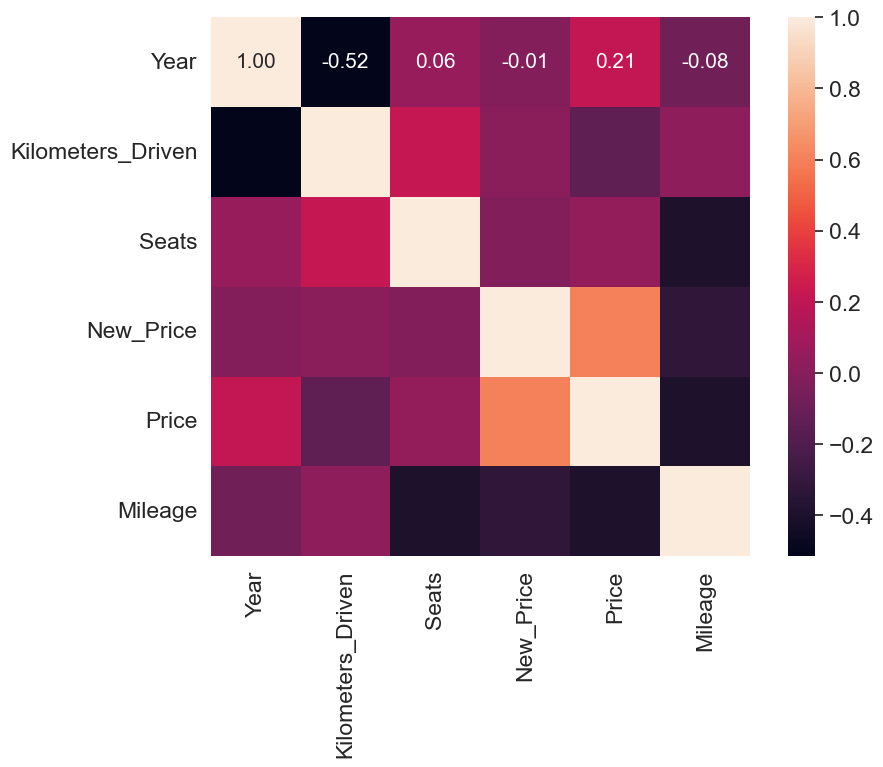

In [94]:
cols = ['Year','Kilometers_Driven','Seats','New_Price','Price','Mileage']
f, ax = plt.subplots(figsize=(10, 7))
cm = np.corrcoef(merged_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

## Training a linear regression Model

In [35]:
x=merged_df[['Kilometers_Driven','Mileage','Seats','Price','Year']]
y=merged_df['New_Price']

In [36]:
## split the data for testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

## Regularization

In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [38]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [39]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007398,0.001197,0.004998,0.000633,0.0001,{'alpha': 0.0001},-7.817886,-7.389121,-7.016559,-8.126249,...,-7.494513,0.419861,28,-7.247254,-7.261746,-7.510987,-6.853480,-7.731529,-7.320999,0.293991
1,0.008747,0.003293,0.005172,0.001438,0.001,{'alpha': 0.001},-7.817881,-7.389120,-7.016559,-8.126247,...,-7.494511,0.419860,27,-7.247252,-7.261745,-7.510985,-6.853478,-7.731526,-7.320997,0.293991
2,0.007802,0.001164,0.004998,0.000895,0.01,{'alpha': 0.01},-7.817837,-7.389117,-7.016555,-8.126228,...,-7.494489,0.419855,26,-7.247224,-7.261730,-7.510966,-6.853455,-7.731496,-7.320974,0.293989
3,0.006521,0.001000,0.003744,0.000815,0.05,{'alpha': 0.05},-7.817641,-7.389101,-7.016541,-8.126142,...,-7.494391,0.419835,25,-7.247103,-7.261667,-7.510880,-6.853355,-7.731364,-7.320874,0.293982
4,0.006203,0.001327,0.004905,0.001205,0.1,{'alpha': 0.1},-7.817395,-7.389082,-7.016523,-8.126035,...,-7.494269,0.419809,24,-7.246952,-7.261587,-7.510773,-6.853231,-7.731200,-7.320749,0.293972


### LinearRegression Model Evaluation

In [47]:

lm=LinearRegression()
predictions= lm.predict(x_test)
plt.scatter(y_test,predictions)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

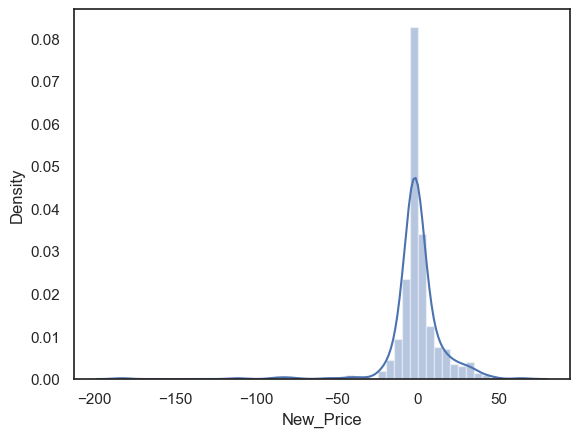

In [254]:
sns.distplot((y_test-predictions),bins=50);

### In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.¶

In [255]:
### regression evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 8.672162371053314
MSE: 304.1478700259787
RMSE: 17.439835722448155


## Training a linear regression Model

In [43]:
x=merged_df[['Kilometers_Driven','Mileage','Seats','Price','Year']]
y=merged_df['New_Price']

In [48]:
## split the data for testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)
lm=LinearRegression()

## Regularization

In [249]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [250]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [251]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [252]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008006,0.003048,0.004592,0.000806,0.0001,{'alpha': 0.0001},-8.311228,-6.333364,-7.133553,-5.938253,...,-7.276341,1.067735,28,-6.529273,-7.589330,-6.736439,-7.648856,-7.232764,-7.147332,0.448334
1,0.008199,0.005306,0.004598,0.001019,0.001,{'alpha': 0.001},-8.311228,-6.333364,-7.133552,-5.938251,...,-7.276340,1.067735,27,-6.529273,-7.589329,-6.736438,-7.648854,-7.232762,-7.147331,0.448334
2,0.006602,0.002153,0.004397,0.001018,0.01,{'alpha': 0.01},-8.311228,-6.333361,-7.133537,-5.938234,...,-7.276327,1.067732,26,-6.529268,-7.589320,-6.736422,-7.648843,-7.232744,-7.147319,0.448333
3,0.005877,0.000461,0.003788,0.000747,0.05,{'alpha': 0.05},-8.311226,-6.333346,-7.133470,-5.938159,...,-7.276268,1.067720,25,-6.529246,-7.589279,-6.736353,-7.648794,-7.232662,-7.147267,0.448329
4,0.005800,0.001600,0.003000,0.000894,0.1,{'alpha': 0.1},-8.311223,-6.333328,-7.133387,-5.938066,...,-7.276195,1.067704,24,-6.529219,-7.589228,-6.736267,-7.648732,-7.232560,-7.147201,0.448325


### LinearRegression Model Evaluation

In [5]:
predictions= lm.predict(x_test)
plt.scatter(y_test,predictions)

NameError: name 'lm' is not defined

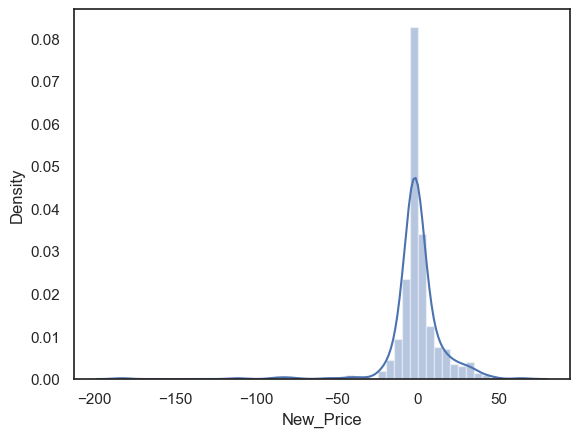

In [254]:
sns.distplot((y_test-predictions),bins=50);

### In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.¶

In [255]:
### regression evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 8.672162371053314
MSE: 304.1478700259787
RMSE: 17.439835722448155
